In [2]:
] add StatsPlots

    Updating registry at `/srv/julia-depot/registries/General.toml`
   Resolving package versions...
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed GR_jll ─────────────────────── v0.72.4+0
   Installed Calculus ───────────────────── v0.5.1
   Installed JpegTurbo_jll ──────────────── v2.1.91+0
   Installed OffsetArrays ───────────────── v1.12.9
   Installed HypergeometricFunctions ────── v0.3.16
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed StatsFuns ──────────────────── v1.3.0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
   Installed FFTW ───────────────────────── v1.6.0
   Installed LoggingExtras ──────────────── v1.0.0
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed RelocatableFolders ─────────── v1.0.0
   Installed Measures ───────────────────── v0.3.2
   Installed PDMats ─────────────────────── v0.11.17
   Instal

In [3]:
using StatsPlots

**Ejercicio** Crea una función `aleatorioUniforme` que tome como argumentos dos números `a` y `b`, y devuelva como salida un número aleatorio distribuido uniformemente en el intervalo $[a,b]\subset\mathbb{R}$. (Sugerencia: Utiliza `rand()` y un poco de aritmética.)

In [6]:
begin 
#Como 0<=|rand()|<=1, entonces 0<=(b-a)|rand()|<=b-a, se sigue a<=a+(b-a)|rand()|<=a+b-a=b
#por tanto a<=a+(b-a)|rand()|<=b
	function aleatorioUniforme(a,b)
		return a+rand()*(b-a)
	end
end

aleatorioUniforme (generic function with 1 method)

**Ejercicio** Verifica con un histograma que tu función `aleatorioUniforme` realmente cumpla la propiedad desada. (Pista: ¿Cómo debería verse el histograma?)

In [7]:
function ArrayAU(N1,a,b) #Esta función se encarga de generar un arreglo de N1 entradas con números aleatorios entre a y b
                         #para ser graficados con la función "histogram()".
#Aquí defino un arreglo para guaradar los números aleatorios.
v=[]
for i in 1:N1
	 #Aquí se agrega un número aleatorio entre a y b.
    push!(v, aleatorioUniforme(a,b))  
end

return v
end

ArrayAU (generic function with 1 method)

In [23]:
ArrayAU(10,-1,1)

10-element Vector{Any}:
 -0.6594847837116
  0.043015896020191624
  0.7214130329098736
  0.8244853796089395
  0.983158457768621
 -0.7073270728253571
 -0.5818662541516981
  0.9006351382973272
  0.02152341148929282
 -0.8324242052736779

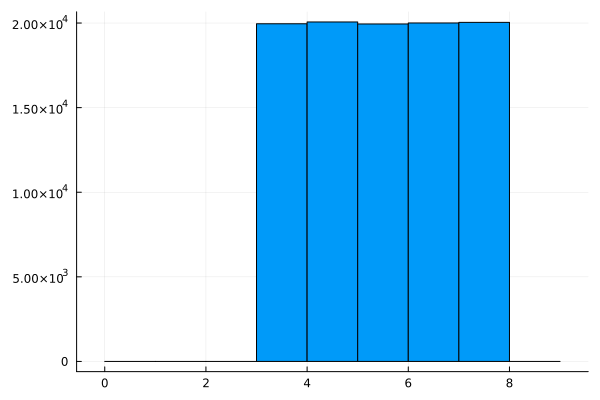

In [8]:
histogram(ArrayAU(100000,3,8),bins=0:9,legend=false)

 ### Modelando una caminata aleatoria

Como estamos modelando el espacio con los números enteros, cada paso sucesivo de nuestro caminante aleatorio debería sumar o restar `1` a la posición anterior con igual probabilidad. 

**Ejercicio** Crea una función `unPaso` que no tome argumentos de entrada y devuelva sólamente los valores `1` y `-1` con igual probabilidad. (Pista: La forma más sencilla de hacerlo es usando `rand(Bool)` y un poco de aritmética...)

In [ ]:
function unPaso()
    return 1-Int(rand(Bool))*(2) #Cuando Int(rand(Bool))=0, unPaso()=1-0*2=1 y 
    #cuando Int(rand(Bool))=1, unPaso()=1-1*2=-1
end


**Ejercicio** Crea una función `variosPasos` que tome como argumento un número entero positivo `n` y devuelva un arreglo con `n` entradas, donde cada una de ellas tiene la misma probabilidad de ser `1` ó `-1`. (Pista: Recuerda que colocar un punto (`.`) antes de un operador aritmético hace que funcione con arreglos.)

In [10]:

function variosPasos(n)
    
   Va=[] #Aquí defino un arreglo para guaradar los números aleatorios 1 ó -1.
   for i in 1:n
      push!(Va, unPaso() ) #Aquí se agrega el número aleatorio al arreglo. 
   end
    return Va

end

variosPasos (generic function with 1 method)

In [11]:
variosPasos(15)


15-element Vector{Any}:
  1
  1
 -1
 -1
 -1
 -1
  1
  1
 -1
  1
  1
  1
  1
  1
  1

 **Ejercicio** Crea una función `caminataAleatoria` que
* tome como entrada un número de pasos `n` y
* devuelva como salida un arreglo con `n+1` posiciones, incluyendo la posición inicial `0`, simulando una caminata aleatoria. (Sugerencia: Puedes usar cualquiera de las funciones `unPaso` o `variosPasos`; la que te resulte más cómoda.)


In [12]:
function caminataAleatoria(N2)
    CA=[0] #Aquí se le agrega el cero al arreglo porque queremos que inicie la partícula en cero.
    for i in 2:N2+1 #Aquí definimos el el ciclo for para que devuelva un arreglo con N2+1 entradas.
        push!(CA, CA[i-1]+ unPaso() )#Aqui se le suma "unPaso()" al paso anterior que dio la partícula.
    end
    return CA

end

caminataAleatoria (generic function with 1 method)

In [13]:
caminataAleatoria(21)

22-element Vector{Int64}:
  0
 -1
 -2
 -1
  0
 -1
  0
 -1
 -2
 -3
 -4
 -5
 -6
 -5
 -4
 -3
 -4
 -3
 -4
 -3
 -4
 -5

**Ejercicio** Crea una función `graficaCaminata` que
* tome como entrada un arreglo -que supondremos que simula una caminata aleatoria en una dimensión- y 
* devuelva como salida una gráfica de posición contra número de pasos, usando _puntos_ (`scatter`) y con etiquetas en los ejes.
(Sugerencia: Crea un bloque de código con `begin` y `end` para poder hacer todo en una sola celda de Pluto.)
Luego, en una celda aparte, define una variable `n2` como un número entero positivo y aplica tu función `graficaCaminata` a `caminataAleatoria(n2)` para generar gráficas de caminatas aleatorias.


In [14]:

function Arrposicion(N) #Esta función se encarga de entregar un arreglo con las entradas enumeradas
                        #para que se pueda graficar junto a "caminataAleatoria".
    T=[0]
    for i in 1:N
        push!(T, i )#Aquí se agrega i en la entrada i
    end
    return T
end

Arrposicion (generic function with 1 method)

In [15]:
Arrposicion(2)

3-element Vector{Int64}:
 0
 1
 2

In [16]:
function graficaCaminata(T)
    n=length(T) #Aquí se cuenta las entradas del arreglo para obtener una arreglo Arrposicion(N) de las misma dimensión.
    Posic=Arrposicion(n-1)

    scatter(Posic,T)#aquí se grafican los arreglos de posición y caminata aleatoria.
    xlabel!("Número de pasos")
    ylabel!("Posición")

end

graficaCaminata (generic function with 1 method)

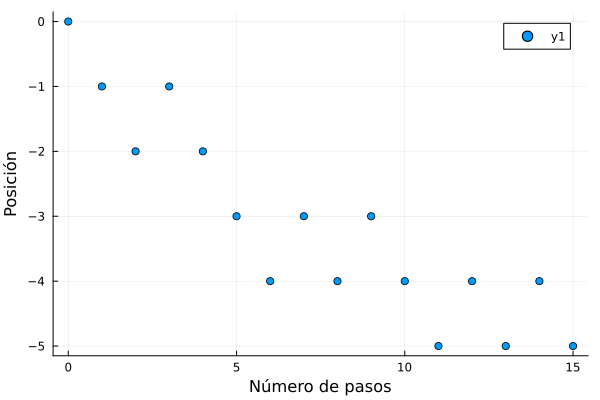

In [17]:
graficaCaminata(caminataAleatoria(15))

**Ejercicio** Crea una función `graficaCaminata!` que sea una versión modificadora de la función anterior y utilice gráficas con líneas rectas punteadas (pues esto nos ayudará a discernir las trayectorias de distintos puntos más fácilmente). Luego, genera una gráfica con 5 caminatas aleatorias.


In [18]:
function graficaCaminata!(T1,T2,T3,T4,T5)
    n=length(T1) #Aquí se cuenta las entradas del arreglo para obtener una arreglo Arrposicion(N) de las misma dimensión.
    Posic=Arrposicion(n-1)
#aquí se grafican los arreglos de posición y las distintas caminatas aleatorias.
    plot(Posic,T1, linewidth = 3, linestyle = :dash)
    plot!(Posic,T2, linewidth = 3, linestyle = :dash)
    plot!(Posic,T3, linewidth = 3, linestyle = :dash)
    plot!(Posic,T4, linewidth = 3, linestyle = :dash)
    plot!(Posic,T5, linewidth = 3, linestyle = :dash)
    xlabel!("Número de pasos")
    ylabel!("Posición")

end

graficaCaminata! (generic function with 1 method)

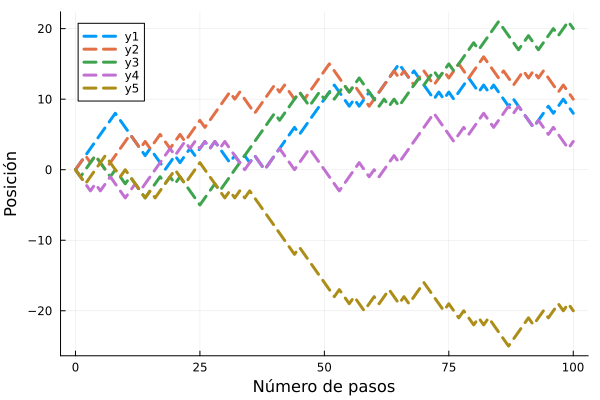

In [19]:

graficaCaminata!(caminataAleatoria(100),caminataAleatoria(100),caminataAleatoria(100),caminataAleatoria(100),caminataAleatoria(100))


**Ejercicio** Crea una función `animaCaminata` que
* tome como entrada un arreglo -que supondremos que simula una caminata aleatoria en una dimensión- y
* devuelva como salida una *animación* de la caminata. (Sugerencia: Usa tu función `graficaCaminata`.)


In [92]:
function animaCaminata(T)
NP=length(T)
List=[]
#push!(List, 0 )
NumPa=[]
#push!(NumPa, 0 )

anima = @animate for t in 1:NP # Por cada t ∈ 0:NP, se va mostrando los pasos del arreglo desde 1 hasta t.
    push!(List, T[t] ) #Aquí se agrega T[t] a list para que grafique hasta la entrada t. 
    push!(NumPa, t-1 ) #Aqui se agrega la posición t-1, mostrantando en la grafica desde 0 hasta t-1.                              
    #Aquí se grafica la línea punteada.
    scatter( NumPa, List,legend = false, title = "Caminata aleatoria", linewidth = 3, linestyle = :dash) #Aquí se grafica la línea punteada
    
  xlabel!("Número de pasos")
  ylabel!("Posición")
  xlims!(0,NP+1) #Aquí se grafica desde 0 hasta NP+1 pasra que se meustren todos los puntos.
  ylims!(-NP/2,NP/2) #Aquí se grafica desde -NP/2 hasta NP/2, ya que en ele caso extremo, sube o baja NP/2 ya que tiene
                     # 50% de probabilidad de subir o  bajar un paso.

  end

gif(anima, "Caminata aleatoria.gif", fps = 10)
end

animaCaminata (generic function with 1 method)

[ Info: Saved animation to /home/paws/Caminata aleatoria.gif


Plots.AnimatedGif("/home/paws/Caminata aleatoria.gif")
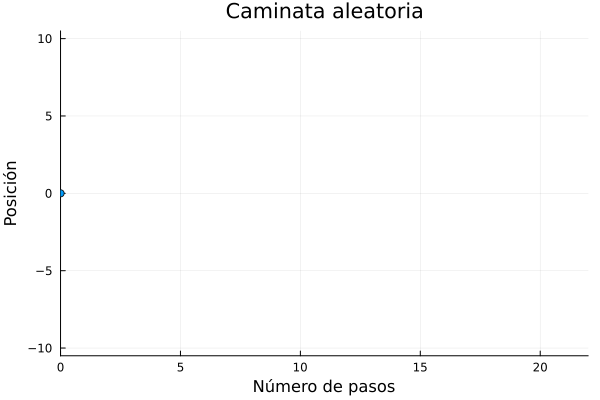

In [93]:
animaCaminata(caminataAleatoria(20))

**Ejercicio** Crea una función `caminataAleatoria2D` que
* tome como entrada un número de pasos `n` y
* devuelva como salida un arreglo con dos subarreglos que tengan `n+1` "posiciones" cada uno -uno de posiciones horizontales y otro de posiciones verticales, incluyendo las posiciones iniciales `0` en cada caso-, simulando una caminata aleatoria.
Utiliza tu función `aleatorioUniforme` para generar números aleatorios en el intervalo $[-1,1]$ y suma números generados por esta función a las posiciones horizontales y verticales para simular un paso continuo en dos dimensiones.

In [28]:
function caminataAleatoria2D(N2)
    CX=[] #Aqui se define el primer subarreglo
    CY=[] #Aqui se define el segundo subarreglo
    push!(CX, 0 )
    push!(CY, 0 )
    for i in 2:N2+1 #Aquí se van a agegar N2 entradas a los subarreglos, contando el cero.
        #Aqui se le suma "aleatorioUniforme(-1,1)" al paso anterior que dio la partícula en cada subarreglo.
        push!(CX, CX[i-1]+ aleatorioUniforme(-1,1) ) 
        push!(CY, CY[i-1]+ aleatorioUniforme(-1,1) )
    end
    return [CX,CY] #Aquí se devulve un arreglo con los dos subarreglos

end

caminataAleatoria2D (generic function with 1 method)

In [132]:
caminataAleatoria2D(21)

2-element Vector{Vector{Any}}:
 [0, -0.8958143350681818, -0.7762227606593735, -0.9318809569452033, -0.398812497207665, -0.935261899919948, -0.7169741191165333, -1.32315587559907, -1.409646575665713, -2.3286793796034564  …  -1.78407524761229, -1.1861468239931177, -0.6354949090615345, -0.8340893270296841, -0.13198123364038383, -0.35622233102570755, 0.5583657039663676, 0.4332250609802346, -0.2525275692731366, -0.9605041973081823]
 [0, -0.05830558885991999, 0.6774497208554764, 0.8942140555866676, 1.6194680125427248, 2.4374807641632157, 3.258097491016787, 3.9076572087340016, 4.586238421390415, 5.551750800306236  …  5.454156710007312, 4.84595604739742, 4.4124177180127155, 5.3968160548248845, 5.959506504829833, 5.815175334684219, 5.923278480176494, 6.86437490987358, 6.178897409507547, 5.636891132791153]

**Ejercicio** Crea una función `graficaCaminata2D` que

* tome como entrada un arreglo con dos subarreglos -que, supondremos, simulan una caminata aleatoria en dos dimensiones- y 
* devuelva como salida una gráfica bidimensional que muestre la trayectoria de la caminata con una línea punteada.

(Sugerencia: Crea un bloque de código con `begin` y `end` para poder hacer todo en una sola celda de Pluto.)

Luego, en una celda aparte, define una variable `n3` como un número entero positivo y aplica tu función `graficaCaminata2D` a `caminataAleatoria2D(n3)` para generar gráficas de caminatas aleatorias en dos dimensiones.

In [133]:
function graficaCaminata2D(T)
    #Aquí se definen los subarreglos.
    T1=T[1]
    T2=T[2]
    plot(T1,T2, linewidth = 3, linestyle = :dash)#Aquí se grafica la línea punteada
    scatter!([T1[1]],[T2[1]],color="blue")#Aquí se grafica el punto inicial.
    scatter!([T1[length(T1)]],[T2[length(T2)]],color="red") #Aquí se grafica el punto final.
    xlabel!("Posición x")
    ylabel!("Posición y")

end

graficaCaminata2D (generic function with 2 methods)

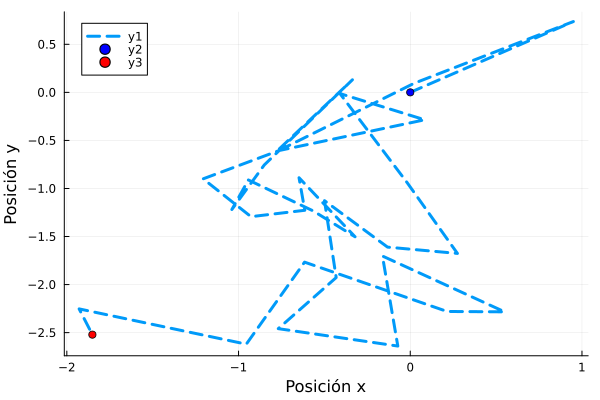

In [134]:
Ar=caminataAleatoria2D(30)
graficaCaminata2D(Ar)

**Ejercicio** Crea una función `graficaCaminata2D!` que sea una versión modificadora de la función anterior. Luego, genera una gráfica con 5 caminatas aleatorias en dos dimensiones (espaciales).

In [55]:
function graficaCaminata2D!(T1,T2,T3,T4,T5)
#Aquí se grafican los subarreglos de las distintas caminatas aleatorias.
    plot(T1[1],T1[2], linewidth = 3, linestyle = :dash)
    plot!(T2[1],T2[2], linewidth = 3, linestyle = :dash)
    plot!(T3[1],T3[2], linewidth = 3, linestyle = :dash)
    plot!(T4[1],T4[2], linewidth = 3, linestyle = :dash)
    plot!(T5[1],T5[2], linewidth = 3, linestyle = :dash)

    xlabel!("Posición x")
    ylabel!("Posición y")

end

graficaCaminata2D! (generic function with 1 method)

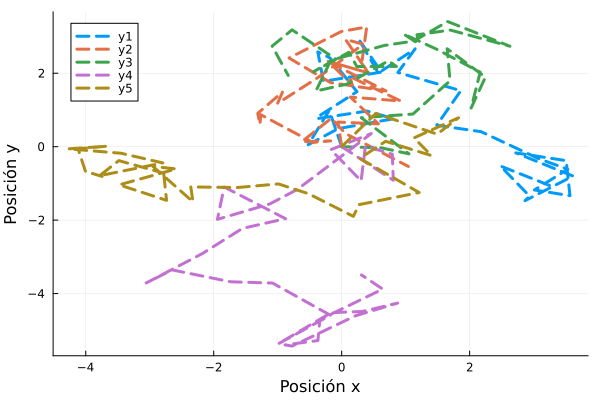

In [56]:
begin   
    A=caminataAleatoria2D(30)
    B=caminataAleatoria2D(30)
    C=caminataAleatoria2D(30)
    D=caminataAleatoria2D(30)
    E=caminataAleatoria2D(30)
    graficaCaminata2D!(A,B,C,D,E)
end

**Ejercicio** Crea una función `animaCaminata2D` que
* tome como entrada un arreglo con dos subarreglos -que, supondremos, simulan una caminata aleatoria en dos dimensiones- y 
* devuelva como salida una *animación* de la caminata. (Sugerencia: Usa tu función `graficaCaminata2D`.)

In [135]:
W=caminataAleatoria2D(50)

2-element Vector{Vector{Any}}:
 [0, 0.875070562837277, 1.3835079961084402, 0.8452881357422328, 0.5745228483953724, 0.06055486014273104, 0.799141336612009, 1.2461190190240778, 0.6436356872684643, 1.524317964770385  …  -0.4177770072064131, -1.1413524043729686, -1.3027644842869708, -1.8201845352861277, -2.323671975530254, -1.401346725430888, -1.4216003137737923, -1.9553779226791537, -2.4260716173909698, -3.185290632960859]
 [0, 0.4449210405013415, 0.1652071291247279, -0.03253677530117627, -0.8264413400796189, -0.884066104765203, -1.8647250152976782, -2.4133955917480665, -2.7670464414826457, -3.438187112816258  …  -4.058319487839149, -4.575685731747837, -3.6418327308029523, -4.031826360021935, -3.4510873067040033, -3.4550797235713544, -4.091912377739008, -3.175746167673503, -3.1995768132515834, -2.406073251567683]

In [80]:
function NuMayMen(A1) #Aquí se define una función que devuelve el número mayor y el número menor de una arreglo. 
Numay=0 
Numen=0

for i in 1:length(A1)#Aquí se recorren todas las entradas del arreglo
    if  Numay<A1[i] #Si se cumple esta condición, queremos que el nuevo Numay sea A1[i]
        Numay=A1[i]  
    end
    if  Numen>A1[i]#Si se cumple esta condición, queremos que el nuevo Numen sea A1[i]
        Numen=A1[i]  
    end
end
    return[Numay, Numen]
end


NuMayMen (generic function with 1 method)

In [118]:
NuMayMen(w1)

2-element Vector{Float64}:
  3.7050594655896836
 -1.939194131432131

In [114]:
function animaCaminata2D(T)
#Aquí se definen los subarreglos
    T1=T[1]
    T2=T[2]
#Aquí se calculan los números mayores y menores de cada arreglo para fijar los ejes de la grafica y que 
#se puedan ver todos los puntos.
    May1=NuMayMen(T1)[1]
    Men1=NuMayMen(T1)[2]
    May2=NuMayMen(T2)[1]
    Men2=NuMayMen(T2)[2]

#Aquí se calcula la dimensión de los subarreglos.
NP=length(T1)
#Aquí se guardaran parcialmente los elementos de los subarreglos.
List=[] 
NumPa=[]


anima = @animate for t in 1:NP # Por cada t ∈ 0:0.1:2π,
    #Aquí se agregan las primeras t entrdas a los subarreglos para ser graficados.
    push!(List, T1[t] )
    push!(NumPa, T2[t] )                               
    #Aquí se grafica la partícula
    plot( List , NumPa,legend = false, title = "Caminata aleatoria en 2D", linewidth = 1, linestyle = :dash) #Aquí se grafica la línea punteada
    scatter!([T1[t]],[T2[t]],color="blue")#Aquí se grafica la partícula para distinguir en que posición va.
  xlabel!("Posición x")
  ylabel!("Posición y")
#Aquí se fijan los ejes con los números mayores y menores de los subarreglos.
  xlims!(Men1-0.5,May1+0.5) 
  ylims!(Men2-0.5,May2+0.5)

  end

gif(anima, "Caminata aleatoria en 2D.gif", fps = 5)
end

animaCaminata2D (generic function with 1 method)

[ Info: Saved animation to /home/paws/Caminata aleatoria en 2D.gif


Plots.AnimatedGif("/home/paws/Caminata aleatoria en 2D.gif")
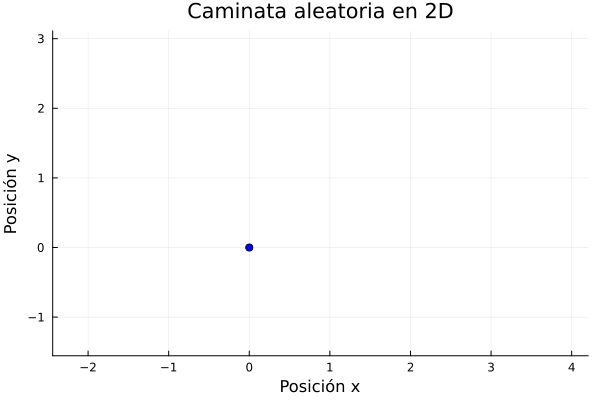

In [131]:
animaCaminata2D(W)

**Ejercicio** ¡Haz una caminata aleatoria en tres dimensiones espaciales y grafícala! (Así se modelan, por ejemplo, las partículas en un gas).

In [120]:
function caminataAleatoria3D(N2)
    #Aqui se define los tres primeros subarreglos
    CX=[]
    CY=[]
    CZ=[]
    #Aqui se pone que la particula inicia en el origen.
    push!(CX, 0 )
    push!(CY, 0 )
    push!(CZ, 0 )
    for i in 2:N2+1 #Aquí se van a agegar N2 entradas a los subarreglos, contando el cero.
        #Aqui se le suma "aleatorioUniforme(-1,1)" al paso anterior que dio la partícula en cada subarreglo.
        push!(CX, CX[i-1]+ aleatorioUniforme(-1,1) )
        push!(CY, CY[i-1]+ aleatorioUniforme(-1,1) )
        push!(CZ, CZ[i-1]+ aleatorioUniforme(-1,1) )
    end
    return [CX,CY,CZ]

end

caminataAleatoria3D (generic function with 1 method)

In [126]:
XYZ=caminataAleatoria3D(50)

3-element Vector{Vector{Any}}:
 [0, 0.7612754490999643, 0.5987836912721973, 1.4324927958699456, 0.7184689471667041, 0.8483729965696158, 0.9961305162383389, 1.8569725529061945, 1.3355939742532439, 0.9770720564361557  …  -5.876280530520593, -5.631508041368803, -5.40171871730385, -4.440232627663299, -4.95290849614265, -4.648925574917001, -4.39136353863265, -5.155932353596449, -4.48028219299265, -4.739899434740148]
 [0, -0.5899624176050786, -0.2800923701567415, -0.9335982236410285, -0.3617854666300653, -1.3424680860385396, -1.1478341683998696, -2.055982096091249, -2.783097045105249, -2.012831570615049  …  -0.2554608354960102, -0.8601895026047215, -1.340730678479658, -2.0070944510478013, -2.8959261497688855, -3.069940513386805, -3.3569045953289294, -3.807202602490059, -3.2723774470192373, -3.2739061884667775]
 [0, 0.8960219413089456, 1.670908947128991, 1.2702596922936409, 1.2134862838933207, 1.0799442290002497, 1.3158422453884067, 1.3777076214641037, 1.4923573243493256, 0.9441212606279519  

In [128]:
function graficaCaminata3D(T1,T2,T3)
    
    plot(T1,T2, T3, linewidth = 1, linestyle = :dash) #Aquí se grafica la línea punteada.
    scatter!([T1[1]],[T2[1]],[T3[1]],color="blue") #Aquí se grafica el punto inicial.
    scatter!([T1[length(T1)]],[T2[length(T2)]],[T3[length(T3)]],color="red") #Aquí se grafica el punto final.
    xlabel!("Posición x")
    ylabel!("Posición y")
    zlabel!("Posición z")

end

graficaCaminata3D (generic function with 1 method)

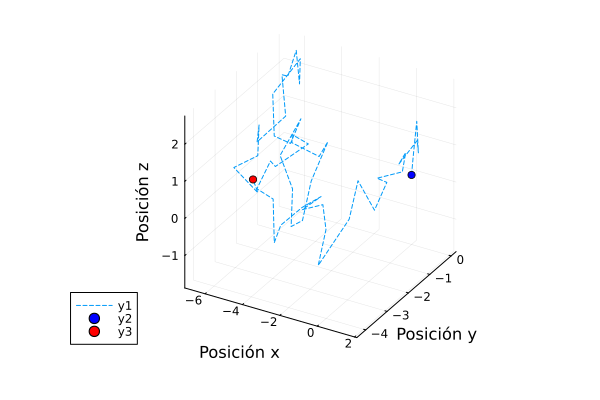

In [129]:
graficaCaminata3D(XYZ[1],XYZ[2],XYZ[3])

# FIN